# 14-day cumulative number of COVID-19 cases per 100 000

At the end of the page, we provide a detailed description of how the numbers are calculated.

### Compute data

In [1]:
import datetime as dt
import pandas as pd
pd.set_option("max_rows", None)
from oscovida import get_incidence_rates_countries

## Table for all countries

In [2]:
cases_incidence, deaths_incidence = get_incidence_rates_countries()

Downloaded data: last data point 12/21/20 from https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv
Downloaded data: last data point 12/21/20 from https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv


In [3]:
cases_incidence

,14-day-sum,population,14-day-incidence-rate
Country,,,
Afghanistan,2297,38928341,5.9
Albania,8989,2877800,312.4
Algeria,6243,43851043,14.2
Andorra,475,77265,614.8
Angola,957,32866268,2.9
Antigua and Barbuda,7,97928,7.1
Argentina,77219,45195777,170.9
Armenia,11137,2963234,375.8
Australia,226,25459700,0.9


## Table sorted by 14-day-incidence

In [4]:
cases_incidence.sort_values(by=['14-day-incidence-rate'], ascending=False)

,14-day-sum,population,14-day-incidence-rate
Country,,,
Turkey,1150074,84339067,1363.6
Lithuania,37061,2722291,1361.4
Georgia,39813,3989175,998.0
Liechtenstein,380,38137,996.4
Croatia,40876,4105268,995.7
San Marino,335,33938,987.1
Luxembourg,6106,625976,975.4
Slovenia,18358,2078932,883.0
US,2795233,329466283,848.4


## Tutorial: Detailed calculation for one country

In [5]:
from oscovida import fetch_cases, get_population
import datetime

In [6]:
period = 14 # Days we compute the incidence rate over

In [7]:
cases = fetch_cases() # Get a DataFrame where each row is the country, and columns cumulative case numbers
cases = cases.groupby(cases.index).sum() # Merge the rows for different regions as we want the numbers for an entire country

In [8]:
cases_germany = cases.loc['Germany'][2:] # First 2 entries are lat/lon so we only take the subsequent ones
cases_germany.tail()

12/17/20    1454009.0
12/18/20    1486839.0
12/19/20    1508518.0
12/20/20    1514962.0
12/21/20    1534218.0
Name: Germany, dtype: float64

In [9]:
yesterday = datetime.datetime.now() - datetime.timedelta(days=1)
x_days_ago = yesterday - datetime.timedelta(days=period)

In [10]:
period_mask = (
    (yesterday > pd.to_datetime(cases_germany.index)) &
    (pd.to_datetime(cases_germany.index) > x_days_ago)
) # Mask for dates between today and x days ago

In [11]:
cases_in_period_per_day_germany = cases_germany[period_mask].diff() # Apply the period mask and get the diff to get the daily new cases
cases_in_period_per_day_germany

12/8/20         NaN
12/9/20     25089.0
12/10/20    32734.0
12/11/20    27217.0
12/12/20    21792.0
12/13/20    14709.0
12/14/20     6451.0
12/15/20    33825.0
12/16/20    32744.0
12/17/20    30179.0
12/18/20    32830.0
12/19/20    21679.0
12/20/20     6444.0
12/21/20    19256.0
Name: Germany, dtype: float64

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


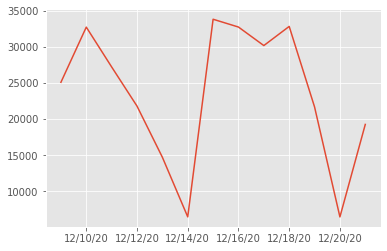

In [12]:
cases_in_period_per_day_germany.plot() # We can easily look at new cases per day

In [13]:
population = get_population().population

In [14]:
population_germany = population.loc['Germany'] # Get the population of Germany
population_germany

83783945.0

In [15]:
incidence_rate_germany = cases_in_period_per_day_germany.sum() / population_germany * 100_000
incidence_rate_germany # By convention this is total cases over period / population * 100_000

363.9706867467269